In [1]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit import IBMQ
from qiskit import transpile
import numpy as np
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview
from qiskit.providers.aer import AerSimulator
import numpy as np
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise
from qiskit.utils.mitigation import CompleteMeasFitter, complete_meas_cal
from qiskit_experiments.library import StateTomography
from qiskit.visualization import array_to_latex

In [2]:
from qiskit import Aer
aer_sim = Aer.get_backend('aer_simulator')
aer_state = Aer.get_backend('statevector_simulator')

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
manila_real = provider.get_backend('ibmq_manila')


In [4]:
manila_sim = AerSimulator.from_backend(manila_real)

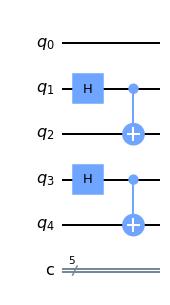

In [5]:
initial_epr = QuantumCircuit(5, 5)

#Hadmard gate on 
initial_epr.h(1)
# #cnot gate on 0 and 1
initial_epr.cx(1, 2)
# #Hadmard gate on 
initial_epr.h(3)
# #cnot gate on 0 and 1
initial_epr.cx(3, 4)
#draw the circuit
# initial_epr.h(0)
# initial_epr.cx(0, 3)
initial_epr.draw('mpl')

In [6]:
bell_state_measurement = QuantumCircuit(5, 5)

#CNOT gate on 1 and 2
bell_state_measurement.cx(2, 3)
#Hadamard on 1
bell_state_measurement.h(2)
#barrier to seperate measurement
bell_state_measurement.barrier((2, 3))
#add z measurement
bell_state_measurement.measure((2 , 3), (2, 3))
# bell_state_measurement.x(4).c_if(3, 1)
# bell_state_measurement.z(4).c_if(2, 1)
bell_state_measurement.cx(3, 4)
bell_state_measurement.cz(2, 4)
#add barrier so BSM happens before CHSH
bell_state_measurement.barrier(range(5))
#bell_state_measurement.draw('mpl')

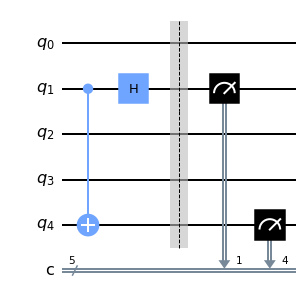

In [7]:
bell_state_measurement_AC = QuantumCircuit(5, 5)

#CNOT gate on 1 and 2
bell_state_measurement_AC.cx(1, 4)
#Hadamard on 1
bell_state_measurement_AC.h(1)
#barrier to seperate measurement
bell_state_measurement_AC.barrier(range(5))
#add z measurement
bell_state_measurement_AC.measure((1 , 4), (1, 4))
bell_state_measurement_AC.draw('mpl')

In [8]:
circuit = initial_epr + bell_state_measurement
# circuit.reset((2,3))

C:\Users\ahoyt\AppData\Local\Temp\ipykernel_27604\859886492.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuit = initial_epr + bell_state_measurement


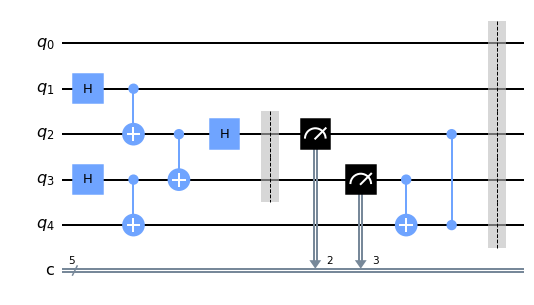

In [9]:
circuit.draw('mpl')

In [10]:
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)

In [11]:
job = aer_state.run(bell)
psi_bell = job.result().get_statevector(bell)
print(psi_bell)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


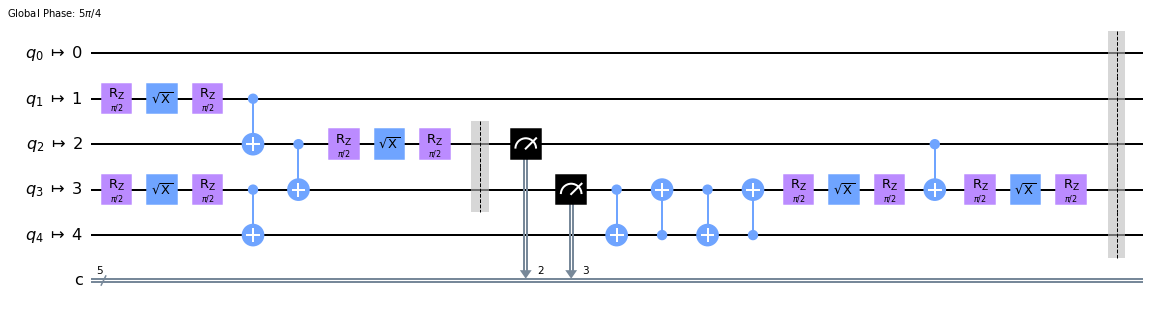

In [12]:
transpile(circuit, manila_real).draw('mpl')

In [13]:
#generate the calibration circuits
# meas_calibs, state_labels = .complete_meas_cal(qubit_list=[1,4])

# job_cal = aer_sim.run(transpile(circuit, manila_real), shots=15000)

# meas_fitter = CompleteMeasFitter(job_cal.result(),state_labels)

tomo_bell = StateTomography(transpile(circuit, manila_real), measurement_qubits=[1, 4])
tomo_bell.analysis.set_options(fitter='linear_inversion')
tomo_bell.analysis.set_options(target=psi_bell)
#no correction


#correct data
# correct_tomo_results = meas_fitter.filter.apply(job_tomo.result(), method='least_squares')
# tomo_bell = StateTomographyFitter(correct_tomo_results, qst_bell)
# rho_bell = tomo_bell.fit()
# F_bell = state_fidelity(psi_bell, rho_bell)

In [14]:
# rho_bell = tomo_bell.run(backend=manila_real)

In [15]:
tomo_bell.run_options

Options(meas_level=<MeasLevel.CLASSIFIED: 2>)

In [16]:
# print(rho_bell.analysis_results("state"))

In [17]:
# rho_bell_density = rho_bell.analysis_results("state").value

In [18]:
# tomo_bell.run_options

In [19]:
from qiskit.visualization import plot_state_city
# plot_state_city(psi_bell)

In [20]:
# plot_state_city(rho_bell_density)

In [21]:
# type(rho_bell_density)

In [22]:
# F_bell = state_fidelity(psi_bell, rho_bell_density)
# print('Fit Fidelity (no correction) =', F_bell)

In [23]:
rho_bell = tomo_bell.run(backend=manila_real)

In [24]:
rho_bell_density = rho_bell.analysis_results("state").value

In [25]:
tomo_bell.analysis_options

Options(figure_names=None, measurement_basis=<PauliMeasurementBasis: PauliMeasurementBasis>, preparation_basis=None, measurement_qubits=None, preparation_qubits=None, fitter='linear_inversion', fitter_options={}, rescale_positive=True, rescale_trace=True, target=Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2)))

In [26]:
rho_bell.analysis_results()

[AnalysisResult(name=state, value=DensityMatrix([[ 0.43316667+0.j        ,  0.00720833-0.006375j  ,
                  0.001     +0.00854167j, -0.02125   -0.012375j  ],
                [ 0.00720833+0.006375j  ,  0.07108333+0.j        ,
                 -0.00325   -0.001125j  , -0.00075   -0.02570833j],
                [ 0.001     -0.00854167j, -0.00325   +0.001125j  ,
                  0.08616667+0.j        ,  0.00045833+0.008875j  ],
                [-0.02125   +0.012375j  , -0.00075   +0.02570833j,
                  0.00045833-0.008875j  ,  0.40958333+0.j        ]],
               dims=(2, 2)), device_components=[<Qubit(Q0)>, <Qubit(Q1)>, <Qubit(Q2)>, <Qubit(Q3)>, <Qubit(Q4)>], experiment_id=6d3d0538-0a37-4fc4-bfaf-7df83ce88c6e, result_id=06e52058-5ba0-462b-9eef-cd4a4247ce42, chisq=None, quality=None, verified=False, extra={'trace': 1.000000000000002, 'eigvals': array([0.45026048, 0.39504559, 0.08617522, 0.06851871]), 'raw_eigvals': array([0.45026048, 0.39504559, 0.08617522, 0.0685187

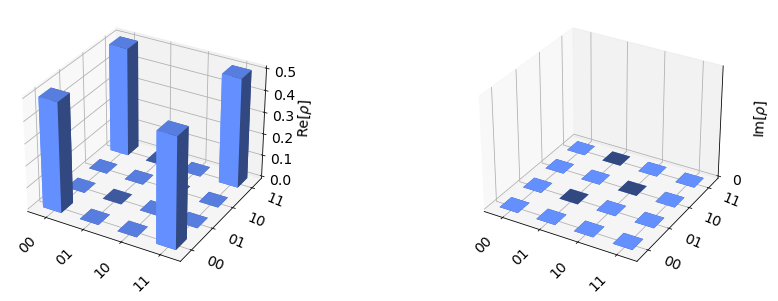

In [27]:
from qiskit.quantum_info import Statevector, DensityMatrix
plot_state_city(DensityMatrix(bell))

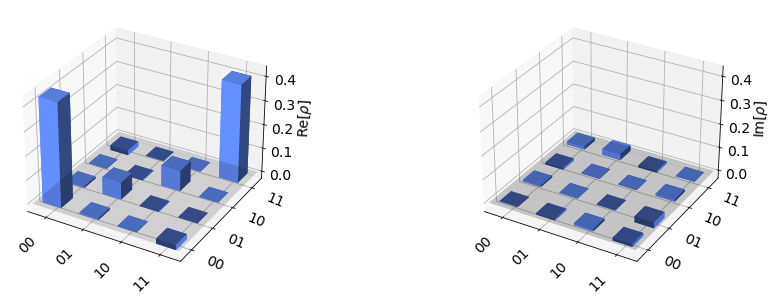

In [28]:
plot_state_city(rho_bell_density)

In [29]:
F_bell = state_fidelity(psi_bell, rho_bell_density)
print('Fit Fidelity (no correction) =', F_bell)

Fit Fidelity (no correction) = 0.4001250000000002


In [30]:
# qr = QuantumRegister(5)
# meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [31]:
# cal_results = manila_sim.run(qobj, shots=10000).result()

# meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
# array_to_latex(meas_fitter.cal_matrix)

In [32]:
manila_sim_job = manila_sim.run(transpile(circuit, manila_real), shots=10000)
aer_sim_job = aer_sim.run(transpile(circuit, manila_real), shots=10000)

In [33]:
# Grab the results from the job.
aer_sim_result = aer_sim_job.result().get_counts()
manila_sim_result = manila_sim_job.result().get_counts()

In [34]:
def prob_epr_pairs(circuit_counts):
    no_shots = sum(circuit_counts[outcome] for outcome in circuit_counts)
    
    zz = 0
    zo = 0
    oz = 0
    oo = 0
    
    for element in circuit_counts:
        if int(element[0]) == 0 and int(element[3]) == 0:
            zz += circuit_counts[element]
            
        if int(element[0]) == 0 and int(element[3]) == 1:
            zo += circuit_counts[element]
            
        if int(element[0]) == 1 and int(element[3]) == 0:
            oz += circuit_counts[element]
            
        if int(element[0]) == 1 and int(element[3]) == 1:
            oo += circuit_counts[element]
            
    return np.array([zz, zo, oz, oo]) / no_shots

In [35]:
print("Mixed State probabilities")
prob = prob_epr_pairs(manila_sim_result)
print(f"zz: {prob[0]}")
print(f"zo: {prob[1]}")
print(f"oz: {prob[2]}")
print(f"oo: {prob[3]}")

Mixed State probabilities
zz: 1.0
zo: 0.0
oz: 0.0
oo: 0.0


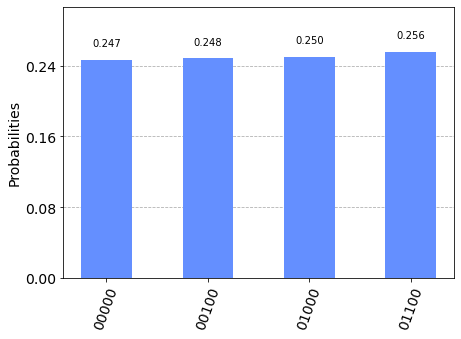

In [36]:
from qiskit.visualization import plot_histogram
plot_histogram(aer_sim_result)